In [ ]:
# Data Description
The concrete compressive strength is a highly nonlinear function of age
and ingredients. These ingredients include cement, blast furnace slag, fly ash, water,
superplasticizer, coarse aggregate, and fine aggregate.
The actual concrete compressive strength (MPa) for a given mixture under a specific
age (days) was determined from the laboratory. Data is in raw form (not scaled).The
data has 8 quantitative input variables, and 1 quantitative output variable, and 1030
instances (observations).

# Attribute Information:
- Cement : measured in kg in a m3 mixture
-Blast : measured in kg in a m3 mixture
-Fly ash : measured in kg in a m3 mixture
-Water : measured in kg in a m3 mixture
-Superplasticizer : measured in kg in a m3 mixture
-Coarse Aggregate : measured in kg in a m3 mixture
-Fine Aggregate : measured in kg in a m3 mixture
-Age : day (1~365)
-Concrete compressive strength measured in MPa


# Objective
Creating a machine learning model which can predict the future strength
of a concrete mix, based on its constituents’ composition and also the age of the
mix.

In [6]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [10]:
# Loading the data
df = pd.read_csv('concrete.csv')

In [11]:
#Basic checks
df.head(61)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
56,475.0,0.0,0.0,228.0,0.0,932.0,594.0,365,41.93
57,198.6,132.4,0.0,192.0,0.0,978.4,825.5,3,9.13
58,304.0,76.0,0.0,228.0,0.0,932.0,670.0,180,50.95
59,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,33.02


In [217]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [218]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [219]:
df.shape

(1030, 9)

In [220]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [222]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [223]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [224]:
#There are no missing values
# check for duplicate values
df.duplicated().sum()

25

#### There are 25 duplicated records which has to be removed

In [225]:
duplicates = df.duplicated()
df[duplicates]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [226]:
# Delete duplicate rows
df.drop_duplicates(inplace=True)

In [227]:
df.shape

(1005, 9)

### Shape of the dataset after removing duplicate is 1005*9

# Exploratory data analysis

In [228]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


# Checking the pairwise relation


# Multivariate analysis

# 1.Distplot method

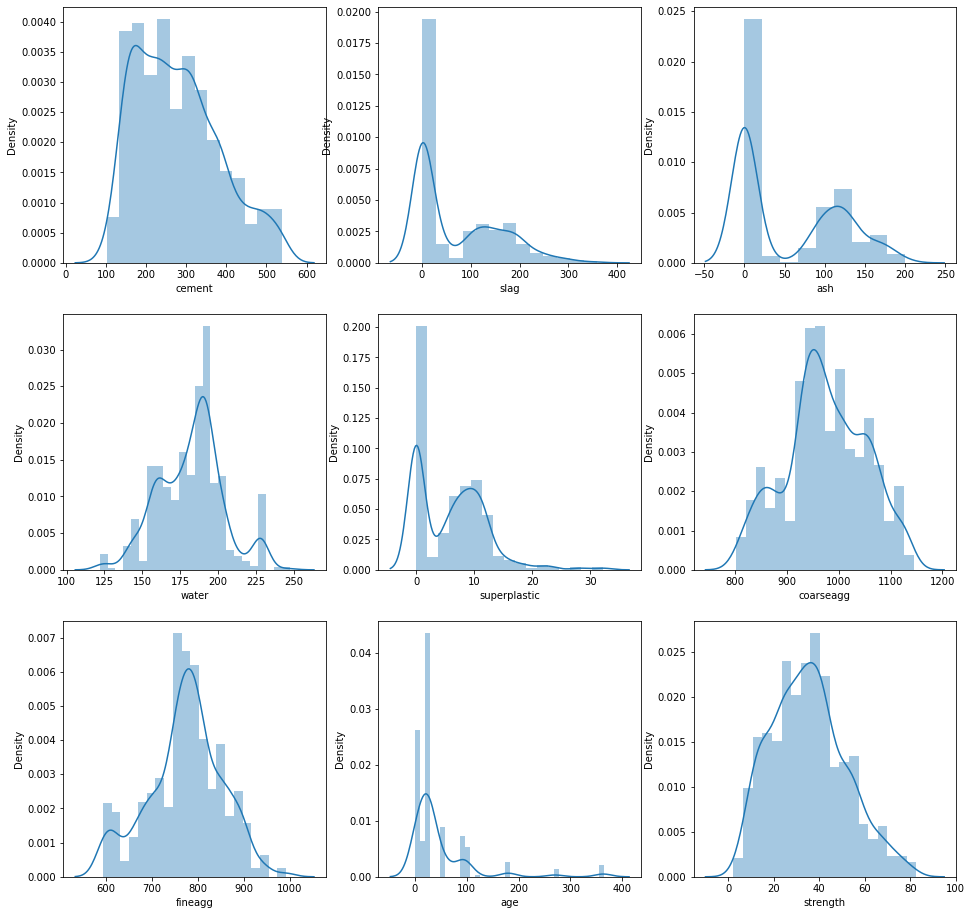

In [229]:
fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])
plt.show()

# Observations


We can see observe that:

#### Cement is almost normal.

#### Slag has three gausssians and rightly skewed.

#### Ash has two gaussians and rightly skewed. 

#### Water has three guassians and slighly left skewed. 

#### Superplastic has two gaussians and rightly skewed. 

#### Coarseagg has three guassians and almost normal. 

#### Fineagg has almost two guassians and looks like normal. 

#### Age has multiple guassians and rightly skewed.

#### The distribution of strength looks close to normal 

## 2. Pair plot method

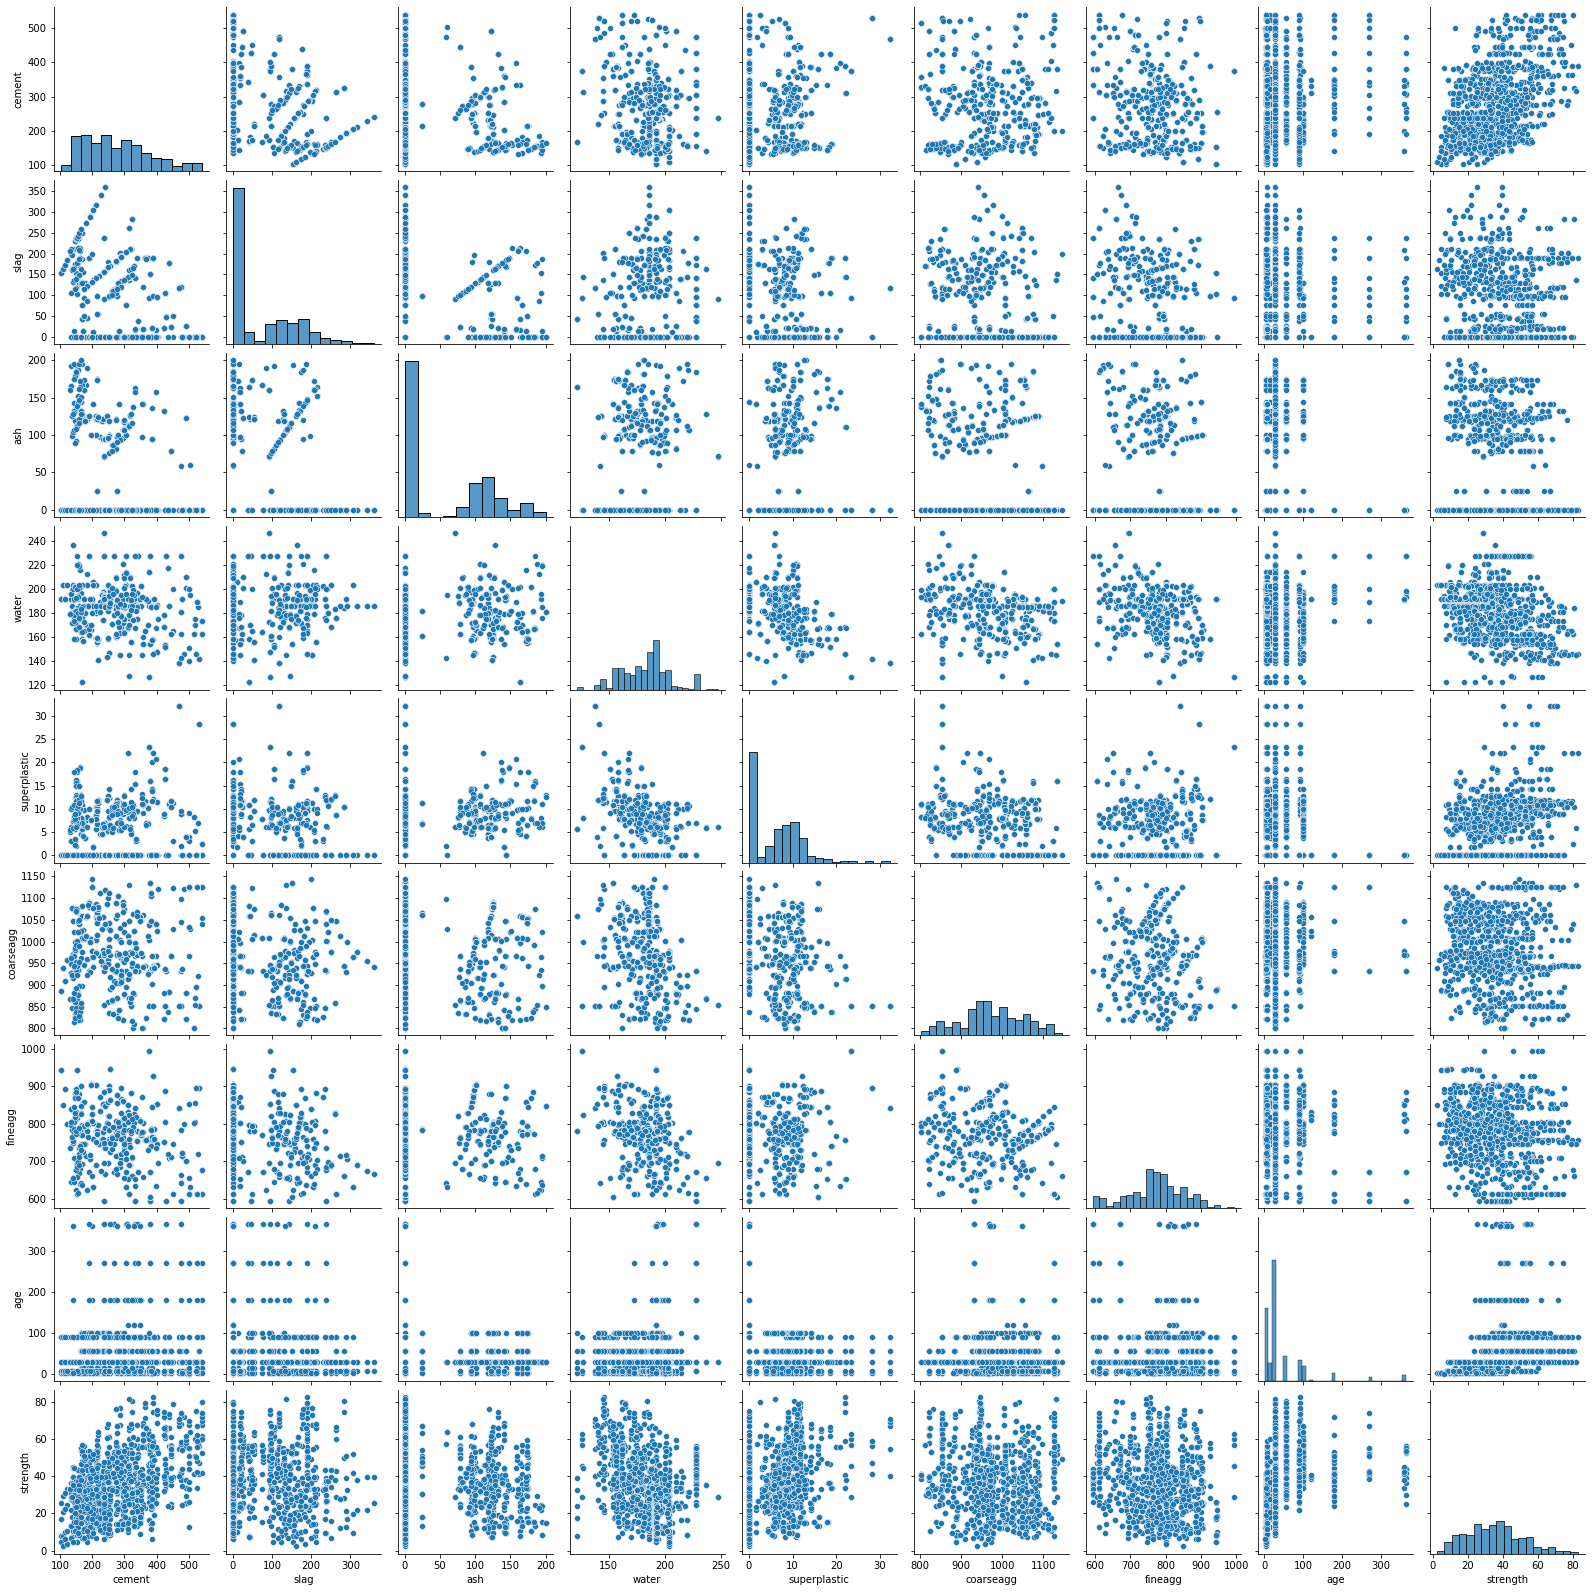

In [230]:
sns.pairplot(df)
plt.show()

### At first glance, there doesn't seem to be any high correlation between any 2 features. Although Cement and strength look like they may have some correlation

# 3.Regression Plot

<AxesSubplot:xlabel='cement', ylabel='strength'>

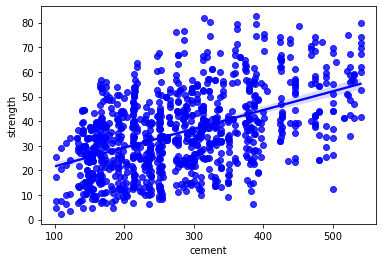

In [231]:
# Cement vs strength 

sns.regplot(x = df['cement'], y = df['strength'], color = 'blue')

<AxesSubplot:xlabel='slag', ylabel='strength'>

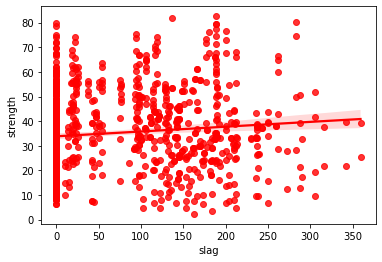

In [232]:
# Blast Furnace slag vs strength

sns.regplot(x = df['slag'], y=df['strength'], color = 'red')

<AxesSubplot:xlabel='ash', ylabel='strength'>

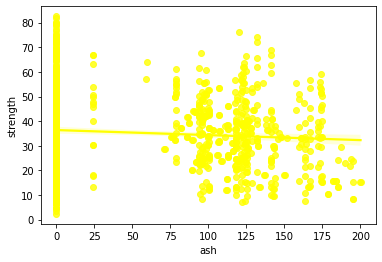

In [233]:
# Ash vs strength

sns.regplot(x = df['ash'], y=df['strength'], color = 'yellow')

<AxesSubplot:xlabel='water', ylabel='strength'>

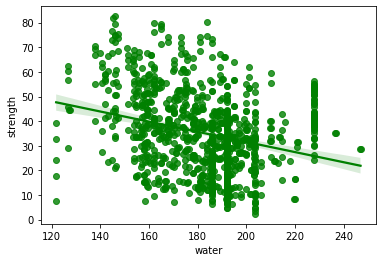

In [234]:
# Water vs strength

sns.regplot(x = df['water'], y=df['strength'], color = 'green')

<AxesSubplot:xlabel='superplastic', ylabel='strength'>

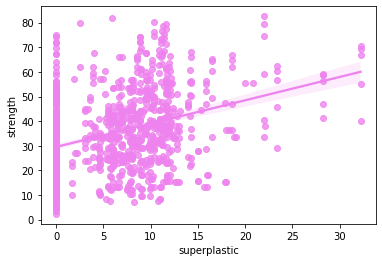

In [235]:
# Superplastic vs strength

sns.regplot(x = df['superplastic'], y=df['strength'], color = 'violet')

<AxesSubplot:xlabel='coarseagg', ylabel='strength'>

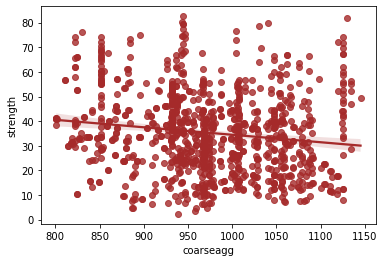

In [236]:
# coarse aggregate vs strength

sns.regplot(x = df['coarseagg'], y=df['strength'], color = 'brown')

<AxesSubplot:xlabel='fineagg', ylabel='strength'>

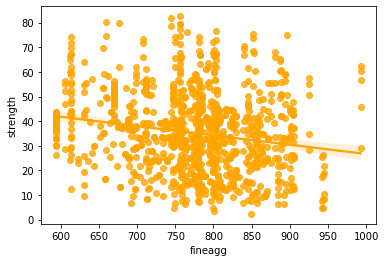

In [237]:
# fine aggregate vs strength

sns.regplot(x = df['fineagg'], y=df['strength'], color = 'orange')

<AxesSubplot:xlabel='age', ylabel='strength'>

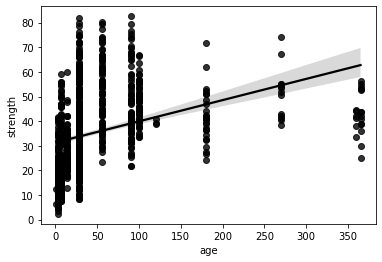

In [238]:
# Age vs strength

sns.regplot(x = df['age'], y=df['strength'], color = 'black')

## 4.Heat Map

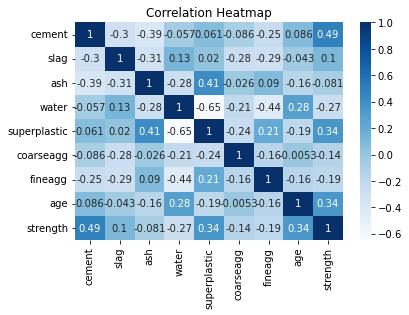

In [239]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.title("Correlation Heatmap")
plt.show()

### No high correlation between strength and other features except for cement.The highest positive correlations is between strength and Cement.
### Age and Superplasticizer are correlated to strength strongly.
### SuperPlasticizer is having high negative correlation and positive correlation with ash and fineagg

#### Some other notable strong correlations include the following:

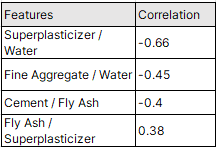

#### We can see a highly negative correlation between superplasticizer and water, but a positive correlation between Superplasticizer and ash.

## 5.Box Plot Method

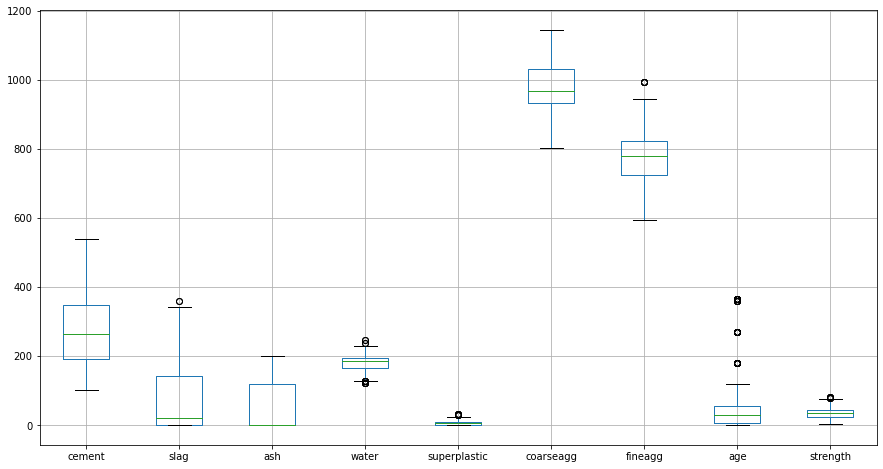

In [240]:
df.boxplot(figsize=(15,8))
plt.show()

# Checking for outliers

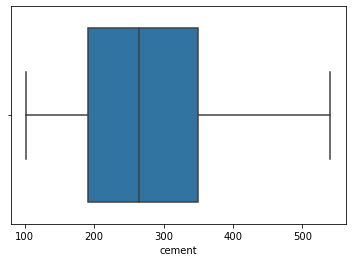

In [241]:

sns.boxplot(data=df,x='cement')
plt.show()

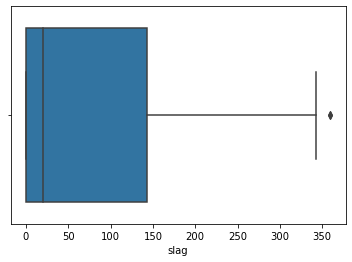

In [242]:
sns.boxplot(data=df,x='slag')
plt.show()

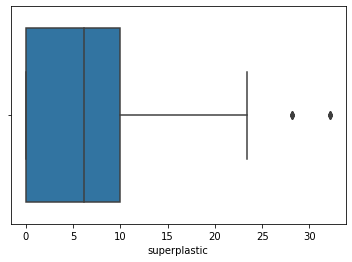

In [243]:

sns.boxplot(data=df,x='superplastic')
plt.show()

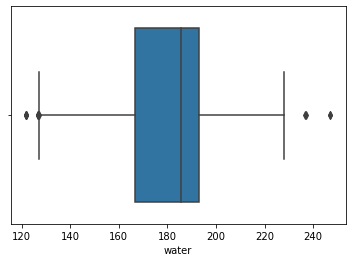

In [244]:
sns.boxplot(data=df,x='water')
plt.show()

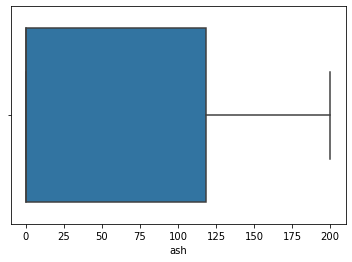

In [245]:
sns.boxplot(data=df,x='ash')
plt.show()

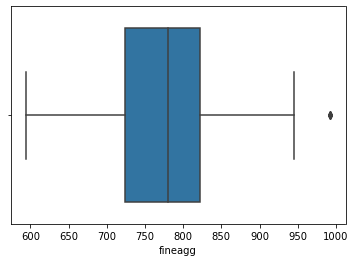

In [246]:
sns.boxplot(data=df,x='fineagg')
plt.show()

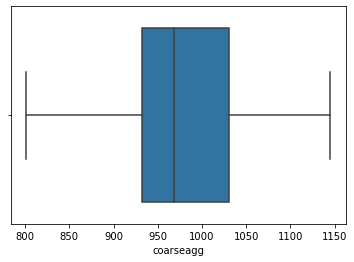

In [247]:
sns.boxplot(data=df,x='coarseagg')
plt.show()

##### Apart from cement,coarseaggregate and ash, all the other independent features are having outliers.
##### The dependent feature also has few outliers

In [248]:
df_outliers = pd.DataFrame(df.loc[:,df.columns.drop(['strength'])])
df_outliers

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


##### The target field Strength also had few outliers, but we are not handling those outliers

In [249]:
Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
Q1,Q3

(cement          190.7
 slag              0.0
 ash               0.0
 water           166.6
 superplastic      0.0
 coarseagg       932.0
 fineagg         724.3
 age               7.0
 Name: 0.25, dtype: float64,
 cement           349.0
 slag             142.5
 ash              118.3
 water            192.9
 superplastic      10.0
 coarseagg       1031.0
 fineagg          822.2
 age               56.0
 Name: 0.75, dtype: float64)

In [250]:
IQR = Q3 - Q1
print(IQR)

cement          158.3
slag            142.5
ash             118.3
water            26.3
superplastic     10.0
coarseagg        99.0
fineagg          97.9
age              49.0
dtype: float64


In [251]:
# Finding upper and lower limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(cement          -46.75
 slag           -213.75
 ash            -177.45
 water           127.15
 superplastic    -15.00
 coarseagg       783.50
 fineagg         577.45
 age             -66.50
 dtype: float64,
 cement           586.45
 slag             356.25
 ash              295.75
 water            232.35
 superplastic      25.00
 coarseagg       1179.50
 fineagg          969.05
 age              129.50
 dtype: float64)

In [252]:
df_outliers.shape

(1005, 8)

In [212]:
# Replace every outlier on the upper side by the upper limit - 
for i, j in zip(np.where(df_outliers > upper_limit)[0], np.where(df_outliers > upper_limit)[1]):
 df_outliers.iloc[i,j] = upper_limit[j]
 print(i,j)
 
# Replace every outlier on the lower side by the lower limit 

for i, j in zip(np.where(df_outliers < lower_limit)[0], np.where(df_outliers < lower_limit)[1]): 
 
 df_outliers.iloc[i,j] = lower_limit[j]

In [210]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [213]:
df_outliers

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0


#### Tried replacing the outliers with median for individual features, however, the metrics on the model improved better when the outliers were imputed with their corresponding lower/upper limits

<AxesSubplot:>

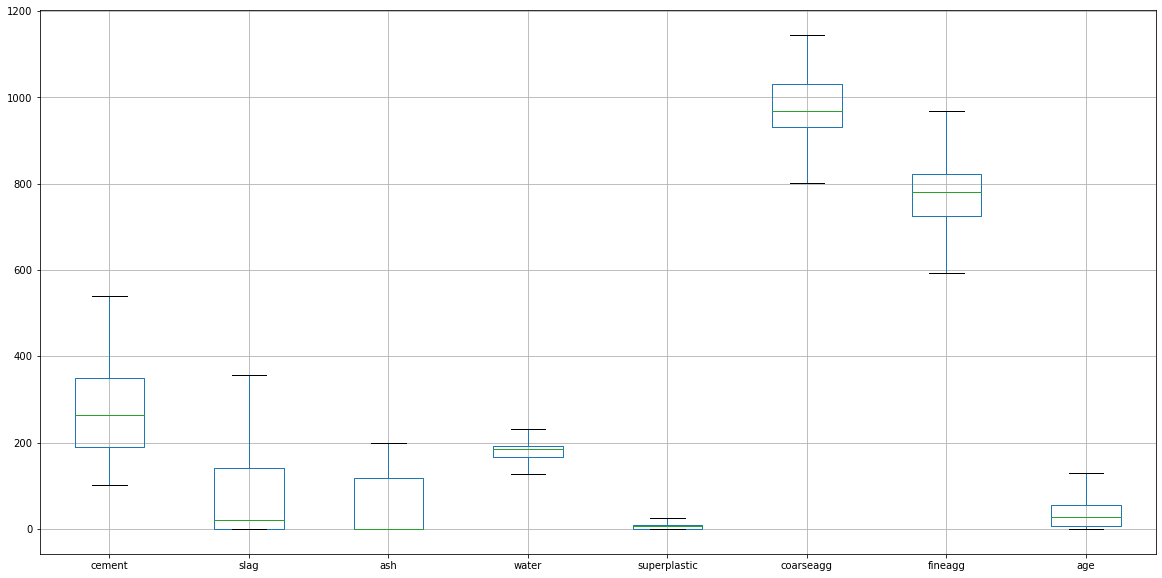

In [139]:
# Create a boxplot for all the continuous features
df_outliers.boxplot(column = ['cement', 'slag','ash', 'water', 'superplastic','coarseagg',
 'fineagg', 'age'], figsize = (20,10))


In [140]:
df_outliers.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
dtype: int64

In [141]:
df_outliers.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.037214,55.536318,182.066816,5.981493,974.376816,772.571095,38.076119
std,104.344261,86.149994,64.207969,21.158645,5.724463,77.579667,80.035934,35.862549
min,102.000000,0.000000,0.000000,127.150000,0.000000,801.000000,594.000000,1.000000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000
max,540.000000,356.250000,200.100000,232.350000,25.000000,1145.000000,969.050000,129.500000


In [142]:
X=df_outliers.iloc[:,:]
y=df.strength

# Model creation

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
MS=MinMaxScaler()
X_train_scl=MS.fit_transform(X_train)
X_test_scl=MS.fit_transform(X_test)

In [144]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

In [145]:
reg_mod1=LinearRegression()
reg_mod2=SVR()
reg_mod3=RandomForestRegressor()
reg_mod4=GradientBoostingRegressor()
reg_mod5=AdaBoostRegressor()
reg_mod6=DecisionTreeRegressor()
reg_mod7=XGBRegressor()
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
models_reg=[reg_mod1,reg_mod2,reg_mod3,reg_mod4,reg_mod5,reg_mod6,reg_mod7]
model_score={}
for models in models_reg:
    print(models)
    models.fit(X_train_scl, y_train)
    y_predict=models.predict(X_test_scl)
    y_pred_train=models.predict(X_train_scl)
    model_score[models]={
    'R2_Score_test':r2_score(y_test,y_predict),
    'MSE_test':mean_squared_error(y_test,y_predict),
    'MAE_test':mean_absolute_error(y_test,y_predict),
    'RMSE_test':mean_squared_error(y_test,y_predict,squared=False),
    'R2_Score_train':r2_score(y_train,y_pred_train),
    'MSE_train':mean_squared_error(y_train,y_pred_train),  
    'MAE_train':mean_absolute_error(y_train,y_pred_train),
    'RMSE_train':mean_squared_error(y_train,y_pred_train,squared=False)

    }

LinearRegression()
SVR()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor()
DecisionTreeRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [146]:
model_score

{LinearRegression(): {'R2_Score_test': 0.6904353759010295,
  'MSE_test': 89.67901207664713,
  'MAE_test': 7.267697079808443,
  'RMSE_test': 9.469900320312096,
  'R2_Score_train': 0.7311303584358403,
  'MSE_train': 68.91779895206429,
  'MAE_train': 6.506633584631571,
  'RMSE_train': 8.301674466760563},
 SVR(): {'R2_Score_test': 0.6659341392002199,
  'MSE_test': 96.7768731723071,
  'MAE_test': 7.340651771675021,
  'RMSE_test': 9.837523731727773,
  'R2_Score_train': 0.7288753405956201,
  'MSE_train': 69.49581462256359,
  'MAE_train': 6.275607296237236,
  'RMSE_train': 8.336414974229845},
 RandomForestRegressor(): {'R2_Score_test': 0.8937687638944706,
  'MSE_test': 30.774550978987676,
  'MAE_test': 3.9488151341647773,
  'RMSE_test': 5.5474814987512735,
  'R2_Score_train': 0.9834650544579361,
  'MSE_train': 4.238306883298173,
  'MAE_train': 1.4035657588692834,
  'RMSE_train': 2.058714862067638},
 GradientBoostingRegressor(): {'R2_Score_test': 0.8914494108327392,
  'MSE_test': 31.44645362884

In [147]:
from sklearn.linear_model import Ridge,Lasso
rd= Ridge(alpha=1)
ls= Lasso(alpha=0.3)
ridge=rd.fit(X_train_scl,y_train)
y_predict_rd=rd.predict(X_test_scl)
lasso=ls.fit(X_train_scl,y_train)
y_predict_ls=ls.predict(X_test_scl)
r2score_ls =r2_score(y_test,y_predict_ls)
r2score_rd =r2_score(y_test,y_predict_rd) 
r2score_ls,r2score_rd

(0.6183684930262766, 0.6872321625352071)

### No significant improvement using L1 and L2 regularization

# KNN

In [148]:
error_rate=[]
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,11):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scl,y_train)
    pred_i=knn.predict(X_test_scl)
    error_rate.append(np.mean(pred_i != y_test))

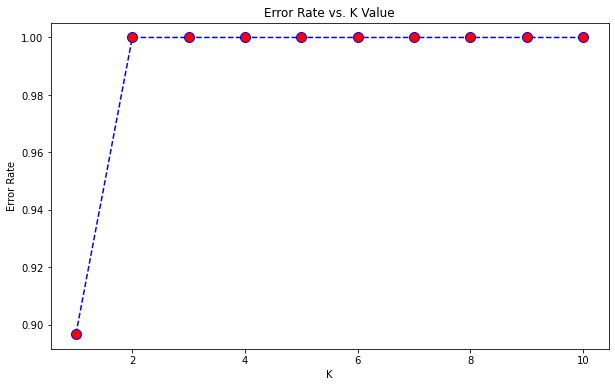

In [149]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [150]:
# chose k value as 3
knn1 = KNeighborsRegressor(n_neighbors=3)
knn1.fit(X_train_scl,y_train)
y_pred_test_knn = knn1.predict(X_test_scl)
y_pred_knn = knn1.predict(X_train_scl)
KNN_score={
    'R2_Score_test':r2_score(y_test,y_pred_test_knn),
    'MSE_test':mean_squared_error(y_test,y_pred_test_knn),
    'MAE_test':mean_absolute_error(y_test,y_pred_test_knn),
    'RMSE_test':mean_squared_error(y_test,y_pred_test_knn,squared=False),
    'R2_Score_train':r2_score(y_train,y_pred_knn),
    'MSE_train':mean_squared_error(y_train,y_pred_knn),  
    'MAE_train':mean_absolute_error(y_train,y_pred_knn),
    'RMSE_train':mean_squared_error(y_train,y_pred_knn,squared=False)

    }
KNN_score

{'R2_Score_test': 0.7607380907905423,
 'MSE_test': 69.31273787477954,
 'MAE_test': 6.081441798941799,
 'RMSE_test': 8.325427188726087,
 'R2_Score_train': 0.8792151386307658,
 'MSE_train': 30.96008438837244,
 'MAE_train': 3.9039796370075255,
 'RMSE_train': 5.564178680485777}

# Summary of performace metrices for all the models:

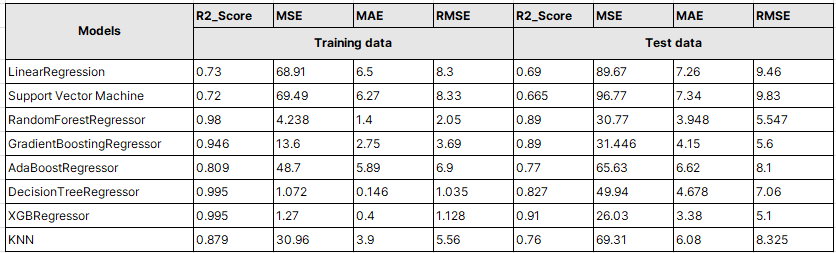

# Hyper parameter tuning for RandomForest

In [151]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [1,2,3,4, 5,]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1,param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True})


In [152]:
rf_clf2 = RandomForestRegressor(n_estimators=1800,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=90,bootstrap=True) #passing best parameter to randomforest
rf_clf2.fit(X_train_scl, y_train)#training 
y_predict_rf=rf_clf2.predict(X_test_scl)#testing
y_pred_rf=rf_clf2.predict(X_train_scl)
r2score=r2_score(y_test,y_predict_rf)
r2score1=r2_score(y_train,y_pred_rf)#checking performance
r2score,r2score1

(0.8943310733416042, 0.9835751644125371)

In [154]:
random_forest_score={
    'R2_Score_test':r2_score(y_test,y_predict_rf),
    'R2_Score_train':r2_score(y_train,y_pred_rf),
    'MSE_test':mean_squared_error(y_test,y_predict_rf),
    'MAE_test':mean_absolute_error(y_test,y_predict_rf),
    'MSE_train':mean_squared_error(y_train,y_pred_rf),  
    'MAE_train':mean_absolute_error(y_train,y_pred_rf),
    'RMSE_train':mean_squared_error(y_train,y_pred_rf,squared=False),
    'RMSE_test':mean_squared_error(y_test,y_predict_rf,squared=False)
    }

In [155]:
random_forest_score

{'R2_Score_test': 0.8943310733416042,
 'R2_Score_train': 0.9835751644125371,
 'MSE_test': 30.611653309891636,
 'MAE_test': 3.919745217729065,
 'MSE_train': 4.210083035973252,
 'MAE_train': 1.3828992788955394,
 'RMSE_train': 2.0518486873971122,
 'RMSE_test': 5.53277988988281}

### Clearly the model is overfitting here. So we can no longer continue with RandomForest

# Hyperparameter tuning for XGBoost

In [261]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.12,0.2,0.25,0.3,0.4,0.8,0.5,0.6,0.7],
              'learning_rate': [0.01, 0.03,0.05,0.04, 0.06, 0.1, 0.2, 0.25, 0.3, 0.4],
              'n_estimators': [100,115,120,125,130,150,160,170],
              'reg_alpha': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,0.7,0.6,0.5],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6,6.4,5.2,6,5.5,5,5.8,5.7,4,4.5],
              'max_depth': [1,2,3,4,5,7,8,9,10],
              'colsample_bylevel': [0.1,0.2,0.3,0.5]}

XGB=XGBRegressor(random_state=42,verbosity=0)
rcv= RandomizedSearchCV(estimator=XGB,param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rcv.fit(X_train_scl, y_train)
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 6, 'reg_alpha': 6.4, 'n_estimators': 170, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.6, 'colsample_bylevel': 0.5})


In [262]:
XGB2=XGBRegressor(reg_lambda= 6, reg_alpha= 6.4, n_estimators=170, learning_rate=0.2, gamma=0.6,max_depth=5,colsample_bylevel=0.5)
XGB2.fit(X_train_scl, y_train)
y_predict_XG_test=XGB2.predict(X_test_scl)
y_pred_XG_train=XGB2.predict(X_train_scl)

In [263]:
XGB_model_score={
    'R2_Score_test':r2_score(y_test,y_predict_XG_test),
    'R2_Score_train':r2_score(y_train,y_pred_XG_train),
    'MSE_test':mean_squared_error(y_test,y_predict_XG_test),
    'MAE_test':mean_absolute_error(y_test,y_predict_XG_test),
    'MSE_train':mean_squared_error(y_train,y_pred_XG_train),  
    'MAE_train':mean_absolute_error(y_train,y_pred_XG_train),
    'RMSE_train':mean_squared_error(y_train,y_pred_XG_train,squared=False),
    'RMSE_test':mean_squared_error(y_test,y_predict_XG_test,squared=False)
    }

In [264]:
XGB_model_score

{'R2_Score_test': 0.910708877546288,
 'R2_Score_train': 0.9868729788198097,
 'MSE_test': 25.867101811684186,
 'MAE_test': 3.3421322533440962,
 'MSE_train': 3.364773357351907,
 'MAE_train': 1.195561398231334,
 'RMSE_train': 1.8343318558406783,
 'RMSE_test': 5.085971078533989}

# Summary of performance metrices for all the models after hyperparameter tuning:
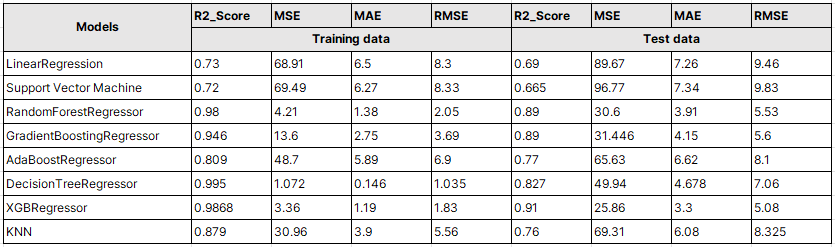

# Conclusion:
#### The initial modelling of XGBoost gave an r2_score of 0.995 on training and 0.91 on testing data.After hyperparameter tuning, though the r2_scores became 0.987 and 0.919 respectively, the test RMSE and MSE reduced.Random forest regressor also performed well with 0.98
#### on training and 0.89 on testing dataset .
#### The model evaluation error metrics in XGBoost was lowest in comparison to all the other models.
#### After analysing all the metrics like(r2_score,MSE,MAE,RMSE),XGBoost regressor is a good model for our regression problem.

# Challenges faced:
### There were outliers on the independent features, which when imputed with median didn't give a better metrics for the model.Hence we replaced the outliers with corresponding upper/lower limits 
### There were outliers on the Target field(Strength),which is not removed or imputed with any values. 